# Evaluación - Redes Convolucionales

**Autor:**

**Correo Electrónico:**

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la entrega 2 de la asignatura optativa de Deep Learning de DuocUC Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import tensorflow as tf
print(tf.__version__)
````

# Entregable

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer personajes en imágenes de los Simpsons con una accuracy en el dataset de test de **85%**. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en el informe:

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes o qué personajes dan más problemas al modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, entre otras.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

✅ **Notas**
* Recuerda partir los datos en training/validation para tener una buena estimación de los valores que el modelo tendrá en los datos de test, así como comprobar que no estamos cayendo en overfitting.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.
* Las imágenes **no están normalizadas**. Hay que normalizarlas como se ha hecho en trabajos anteriores.
* El test set del problema tiene imágenes un poco más "fáciles", por lo que es posible encontrarse con métricas en el test set bastante mejores que en el training set.

# Descarga de la data

In [19]:
!wget -O simpsons_train.tar.gz https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr&st=b96sg8iu&dl=0

--2025-05-06 17:24:16--  https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4813a478c6088a1a960e0e9c49.dl.dropboxusercontent.com/cd/0/inline/CpIh55S6XK5zDY1mIbLTgwjK7c1tox3BC0hl2W1lbmBGFwX64rTdqhLMQDVN9QQ3vSyefGwmjgIIKL0M6nPoyv3Sfl_4ooF1jLU72UZKENHJZbmQ5-HypbBrRuat98vacZ2jsQ3sA8hb1EZs8ln5g4jC/file# [following]
--2025-05-06 17:24:16--  https://uc4813a478c6088a1a960e0e9c49.dl.dropboxusercontent.com/cd/0/inline/CpIh55S6XK5zDY1mIbLTgwjK7c1tox3BC0hl2W1lbmBGFwX64rTdqhLMQDVN9QQ3vSyefGwmjgIIKL0M6nPoyv3Sfl_4ooF1jLU72UZKENHJZbmQ5-HypbBrRuat98vacZ2jsQ3sA8hb1EZs8ln5g4jC/file
Resolving uc4813a478c6088a1a960e0e9c49.dl.dropboxusercontent.com (uc4813a478c6088a1a960e0e9c49.dl.dropboxusercontent.com)... 162.125.5.1

In [20]:
!wget -O simpsons_test.tar.gz https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni&st=qau98qns&dl=0

--2025-05-06 17:24:26--  https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7bc03ebb4eee913f60647fcbfd.dl.dropboxusercontent.com/cd/0/inline/CpJdZqqb5x0qIc9_KMR-R8GI9YyP1RLHkCJtqDcfoyuiVxQhbUuPZbP2K5AdQrHTcSijjzGd_AD3FGoFu3hJFTV521XZ2h7wLcOKdw_Hcpt-oW31Yn9ZCkO1_djKUKkFVER_1L9cKn49vpyugCzvofUW/file# [following]
--2025-05-06 17:24:27--  https://uc7bc03ebb4eee913f60647fcbfd.dl.dropboxusercontent.com/cd/0/inline/CpJdZqqb5x0qIc9_KMR-R8GI9YyP1RLHkCJtqDcfoyuiVxQhbUuPZbP2K5AdQrHTcSijjzGd_AD3FGoFu3hJFTV521XZ2h7wLcOKdw_Hcpt-oW31Yn9ZCkO1_djKUKkFVER_1L9cKn49vpyugCzvofUW/file
Resolving uc7bc03ebb4eee913f60647fcbfd.dl.dropboxusercontent.com (uc7bc03ebb4eee913f60647fcbfd.dl.dropboxusercontent.com)... 162.125.5.15

In [21]:
!tar -xzvf simpsons_train.tar.gz

Se han truncado las últimas 5000 líneas del flujo de salida.
simpsons/mayor_quimby/pic_0116.jpg
simpsons/milhouse_van_houten/pic_0576.jpg
simpsons/lenny_leonard/pic_0149.jpg
simpsons/kent_brockman/pic_0446.jpg
simpsons/nelson_muntz/pic_0060.jpg
simpsons/krusty_the_clown/pic_0838.jpg
simpsons/homer_simpson/pic_0637.jpg
simpsons/homer_simpson/pic_0495.jpg
simpsons/krusty_the_clown/pic_0893.jpg
simpsons/homer_simpson/pic_0834.jpg
simpsons/homer_simpson/pic_0692.jpg
simpsons/lisa_simpson/pic_0755.jpg
simpsons/marge_simpson/pic_0654.jpg
simpsons/chief_wiggum/pic_0344.jpg
simpsons/lisa_simpson/pic_0952.jpg
simpsons/lisa_simpson/pic_1269.jpg
simpsons/marge_simpson/pic_0851.jpg
simpsons/marge_simpson/pic_1168.jpg
simpsons/chief_wiggum/pic_0541.jpg
simpsons/homer_simpson/pic_1948.jpg
simpsons/sideshow_bob/pic_0104.jpg
simpsons/lisa_simpson/pic_0278.jpg
simpsons/nelson_muntz/pic_0128.jpg
simpsons/marge_simpson/pic_0177.jpg
simpsons/milhouse_van_houten/pic_0699.jpg
simpsons/waylon_smithers/pic_00

In [4]:
!tar -xzvf simpsons_test.tar.gz

simpsons_testset/charles_montgomery_burns_46.jpg
simpsons_testset/marge_simpson_35.jpg
simpsons_testset/abraham_grampa_simpson_9.jpg
simpsons_testset/krusty_the_clown_40.jpg
simpsons_testset/apu_nahasapeemapetilon_10.jpg
simpsons_testset/homer_simpson_24.jpg
simpsons_testset/lenny_leonard_17.jpg
simpsons_testset/marge_simpson_3.jpg
simpsons_testset/milhouse_van_houten_13.jpg
simpsons_testset/apu_nahasapeemapetilon_29.jpg
simpsons_testset/lenny_leonard_34.jpg
simpsons_testset/bart_simpson_27.jpg
simpsons_testset/ned_flanders_12.jpg
simpsons_testset/charles_montgomery_burns_3.jpg
simpsons_testset/milhouse_van_houten_30.jpg
simpsons_testset/apu_nahasapeemapetilon_46.jpg
simpsons_testset/mayor_quimby_3.jpg
simpsons_testset/kent_brockman_6.jpg
simpsons_testset/chief_wiggum_25.jpg
simpsons_testset/nelson_muntz_37.jpg
simpsons_testset/moe_szyslak_28.jpg
simpsons_testset/bart_simpson_44.jpg
simpsons_testset/homer_simpson_36.jpg
simpsons_testset/milhouse_van_houten_49.jpg
simpsons_testset/comic

In [22]:
import cv2, os, pprint
import numpy as np
import keras
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import itertools

import keras
from google.colab.patches import cv2_imshow
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Activation , Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adadelta
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.python.keras import backend as keras_backend

from time import time

In [23]:
def load_train_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función carga los datos de training en imágenes.

    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.

    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas

    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

def load_test_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)

In [24]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Se utilizan sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel',
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson',
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak',
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Se estandarizan todas las imágenes a tamaño 64x64
IMG_SIZE = 64

In [25]:
# Carga los datos
DATASET_TRAIN_PATH_COLAB = "simpsons"
DATASET_TEST_PATH_COLAB = "simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_test, y_test = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


In [26]:
# Se va a barajar aleatoriamente los datos. Esto es importante ya que si no
# se realiza y, por ejemplo, se escogen el 20% de los datos finales como validation
# set, se estará utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

In [27]:
# Separa el conjunto de datos de entrenamiento en entrenamiento y validación con 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=29)

# Variables con nÚmero de elementos
X_train_num_elem = X_train.shape[0]
X_val_num_elem = X_val.shape[0]
X_test_num_elem = X_test.shape[0]

# Dimensiones
img_rows = IMG_SIZE
img_cols = IMG_SIZE
img_channels = X.shape[3]

# Número de categorías
num_categ = len(MAP_CHARACTERS)

# Comprueba que efectivamente los resultados son los esperados
print("Número de imágenes de anterior training : ", X.shape[0])
print("Número de imágenes de training (80% de anterior train) : ", X_train_num_elem)
print("Número de imágenes de validación (20% de anterior train) : ", X_val_num_elem)
print("Número de imágenes de test : ", X_test_num_elem)
print("="*15)
print("Número de resultados de anterior training : ", y.shape[0])
print("Número de resultados de training (80% de anterior train) : ", y_train.shape[0])
print("Número de resultadoss de validación (20% de anterior train) : ", y_val.shape[0])
print("Número de resultados de test : ", y_test.shape[0])
print("="*15)
print("Dimensiones de training : ", X_train.shape)
print("Dimensiones de validation : ", X_val.shape)
print("Dimensiones de tests : ", X_test.shape)
print("="*15)
print("Canales de color para las imagenes : ", img_channels)
print("Resolución imágenes de anterior training : ", X.shape[1], "x", X.shape[2])
print("Resolución imágenes de training (80% de anterior train) : ", X_train.shape[1], "X", X_train.shape[2])
print("Resolución imágenes de validación (20% de anterior train) : ", X_val.shape[1], "x", X_val.shape[2])
print("Resolución imágenes de test : ", X_test.shape[1], "x", X_test.shape[2])

Número de imágenes de anterior training :  18992
Número de imágenes de training (80% de anterior train) :  15193
Número de imágenes de validación (20% de anterior train) :  3799
Número de imágenes de test :  890
Número de resultados de anterior training :  18992
Número de resultados de training (80% de anterior train) :  15193
Número de resultadoss de validación (20% de anterior train) :  3799
Número de resultados de test :  890
Dimensiones de training :  (15193, 64, 64, 3)
Dimensiones de validation :  (3799, 64, 64, 3)
Dimensiones de tests :  (890, 64, 64, 3)
Canales de color para las imagenes :  3
Resolución imágenes de anterior training :  64 x 64
Resolución imágenes de training (80% de anterior train) :  64 X 64
Resolución imágenes de validación (20% de anterior train) :  64 x 64
Resolución imágenes de test :  64 x 64


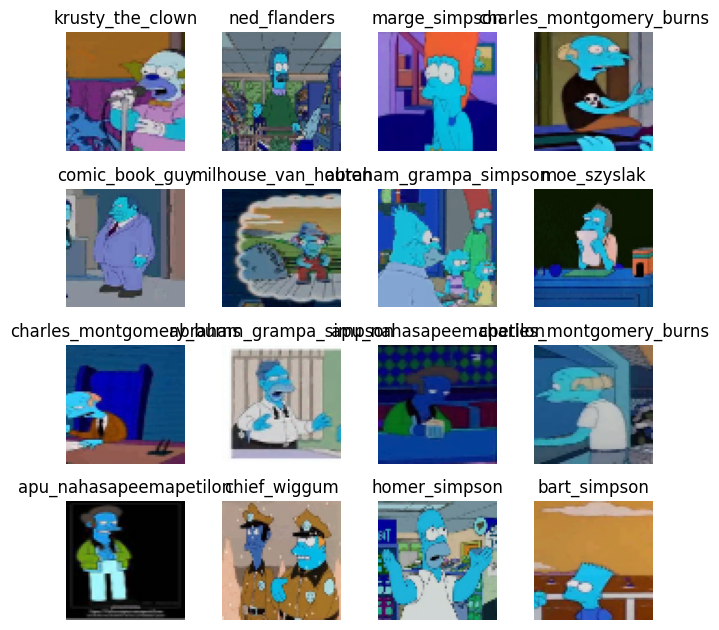

In [28]:
h = 4  # alto de la grilla
w = 4  # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h, 1.6*w))
for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(X_test))
        axs[i, j].imshow(X_test[ex])
        axs[i, j].set_title(MAP_CHARACTERS[y_test[ex]])
        axs[i, j].axis('off')
plt.tight_layout()
plt.show()

In [29]:
# Normaliza las imágenes (pasa de [0, 255] a [0.0, 1.0])
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convierte las etiquetas a one-hot encoding
Y_train = keras.utils.to_categorical(y_train, num_categ)
Y_val = keras.utils.to_categorical(y_val, num_categ)
Y_test = keras.utils.to_categorical(y_test, num_categ)

print(X_train.shape, X_val.shape, X_test.shape)
print(Y_train.shape, Y_val.shape, Y_test.shape)

(15193, 64, 64, 3) (3799, 64, 64, 3) (890, 64, 64, 3)
(15193, 18) (3799, 18) (890, 18)


# Definición de modelos

Incluir acá los modelos con los cuales se va a trabajar

## Modelo 1

In [30]:
# Setea los seed para números random

np.random.seed(10)
tf.random.set_seed(10)

# Crea una red neuronal convolucional simple

red_conv = keras.Sequential(name="red_neuronal_1")
red_conv.add(Input(shape=(64, 64, 3), name="entrada"))
red_conv.add(Conv2D(64, (3,3), activation='relu', name="convolucion_1"))
red_conv.add(MaxPooling2D((2,2), name="pooling_1"))
red_conv.add(Flatten(name="flatten_1"))
red_conv.add(Dense(128, activation='relu', name="densa_1"))
red_conv.add(Dense(64, activation='relu', name="densa_2"))
red_conv.add(Dense(18, activation='softmax', name="salida"))

red_conv.summary()

red_conv.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'F1Score'])

Model: "red_neuronal_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densa_1 (Dense)                 │ (None, 128)            │     7,872,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densa_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         1,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,883,858 (30.07 MB)

 Trainable params: 7,883,858 (30.07 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
start_time = time()
hist = red_conv.fit(
    X_train,Y_train,
    batch_size=32,
    epochs=15,
    validation_data=(X_test,Y_test)
)
end_time = time()
time = end_time - start_time
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time - start_time))

Epoch 1/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 91s 190ms/step - F1Score: 0.0540 - accuracy: 0.1407 - loss: 2.7490 - val_F1Score: 0.1566 - val_accuracy: 0.2090 - val_loss: 2.5770
Epoch 2/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 139s 184ms/step - F1Score: 0.2274 - accuracy: 0.3041 - loss: 2.3146 - val_F1Score: 0.3193 - val_accuracy: 0.3551 - val_loss: 2.1727
Epoch 3/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 141s 182ms/step - F1Score: 0.3506 - accuracy: 0.4020 - loss: 2.0196 - val_F1Score: 0.4373 - val_accuracy: 0.4562 - val_loss: 1.8886
Epoch 4/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 140s 179ms/step - F1Score: 0.4422 - accuracy: 0.4732 - loss: 1.7916 - val_F1Score: 0.5030 - val_accuracy: 0.5169 - val_loss: 1.6841
Epoch 5/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 143s 181ms/step - F1Score: 0.5076 - accuracy: 0.5294 - loss: 1.5973 - val_F1Score: 0.5484 - val_accuracy: 0.5607 - val_loss: 1.5290
Epoch 6/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 86s 181ms/step - F1Score: 0.5616 - accuracy: 0.5783 - loss: 1.4332 - val_F1Score: 0.5868 - val_accura

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


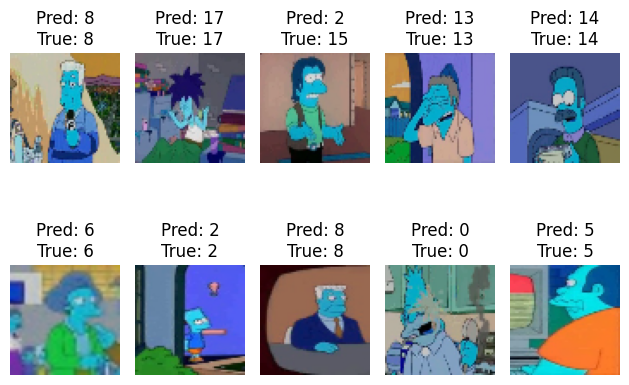

In [38]:
# Seleccionamos 10 índices al azar del conjunto de test
indices = np.random.choice(X_test.shape[0], 10, replace=False)

# Seleccionamos las imágenes y las etiquetas correspondientes
sample_images = X_test[indices]
sample_labels = Y_test[indices]

# Hacemos las predicciones
predictions = red_conv.predict(sample_images)

# Mostramos las imágenes con las predicciones
for i in range(10):
    plt.subplot(2, 5, i+1)  # Crea una subgráfica para cada imagen (2 filas, 5 columnas)
    plt.imshow(sample_images[i])  # Muestra la imagen
    plt.axis('off')  # No mostrar los ejes
    predicted_class = np.argmax(predictions[i])  # Clase predicha
    true_class = np.argmax(sample_labels[i])  # Etiqueta verdadera
    plt.title(f"Pred: {predicted_class}\nTrue: {true_class}")  # Título con predicción y clase verdadera
plt.tight_layout()  # Ajusta el espaciado entre las subgráficas
plt.show()

## Modelo 2

## Modelo `n`